In [95]:
from sklearn.mixture import GaussianMixture as GMM
import sys, os
from matplotlib import pyplot as plt
import numpy as np

notebook_path = os.path.dirname(os.path.abspath(""))
sys.path.insert(0, notebook_path)

import matplotlib.font_manager as fm
from model.nba_api_helpers import get_player_shot_loc_data
from model.utils.plotting import draw_court
import matplotlib as mpl
from highlight_text import fig_text, ax_text
from sklearn.model_selection import GridSearchCV
from matplotlib.patches import Ellipse




In [133]:
font_path = os.path.join(os.path.abspath(os.path.dirname("")), "assets/fonts")
style_path = os.path.join(os.path.abspath(os.path.dirname("")), "assets/stylesheets/nba.mplstyle")
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

if os.path.isfile(style_path):
    plt.style.use(style_path)
else:
    print('Could not locate style sheet')
    
from matplotlib import rcParams
rcParams['axes.titlepad'] = -40 

In [58]:
df = get_player_shot_loc_data('Luka Doncic', context_measure_simple='FG3A')
df = df[['LOC_X', 'LOC_Y']].dropna()
df = df.loc[df['LOC_Y'] < 350]
loc_x = df['LOC_X'].values
loc_y = df['LOC_Y'].values

In [119]:
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        beg_alpha = 0.4
        for n_sig in range(1, 4):
            ell = mpl.patches.Ellipse(
                gmm.means_[n, :2], v[0]*n_sig, v[1]*n_sig, angle=180 + angle, color=color
            )
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(beg_alpha/n_sig**1.2)
            ax.add_artist(ell)
            ax.set_aspect("equal", "datalim")

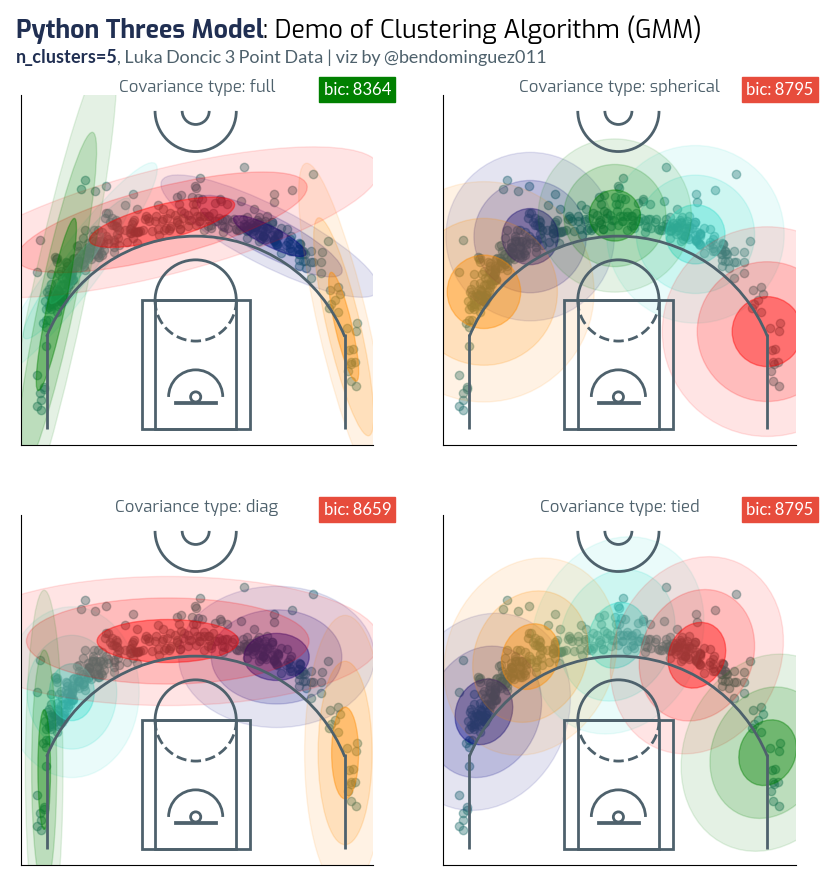

In [172]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
cov_types = ['full', 'spherical', 'diag', 'tied']
colors = ["navy", "turquoise", "darkorange", 'red', 'green']

red = "#E74C3C"
green = "green"
grey = "#4E616C"
fc = 'white'
box_padding = 3
        
for ax, cov_type in zip(axes, cov_types):
    model_i = GMM(n_components=5, covariance_type=cov_type).fit(df.values)
    bic = int(model_i.bic(df.values))
    ax.set_title('Covariance type: ' + cov_type, color=grey)
    ax.scatter(loc_x, loc_y, alpha=0.4);
    make_ellipses(model_i, ax)
    ax.set_xticks([]);
    ax.set_yticks([]);
    ax.set_facecolor('#fff');
    draw_court(ax, color='#4E616C')
    if cov_type == 'full':
        ax_text(
                    x = 0.86,
                    y = 1.039,
                    s = f'<bic: {bic}>',
                    ax = ax, 
                    highlight_textprops=[
                        {'size':'12', 'bbox': {'edgecolor': green, 'facecolor': green, 'pad': box_padding}, 'color': 'white'},
                    ],
                    font = 'Lato', 
                    ha = 'left', 
                    size = 14, 
                    annotationbbox_kw = {'xycoords':'axes fraction'})
    else:
        ax_text(
                    x = 0.86,
                    y = 1.039,
                    s = f'<bic: {bic}>',
                    ax = ax, 
                    highlight_textprops=[
                        {'size':'12', 'bbox': {'edgecolor': red, 'facecolor': red, 'pad': box_padding}, 'color': 'white'},
                    ],
                    font = 'Lato', 
                    ha = 'left', 
                    size = 14, 
                    annotationbbox_kw = {'xycoords':'axes fraction'})

fig.set_facecolor('#fff');    

fig_text(
            x=0.12, y=.96, s="<Python Threes Model>: Demo of Clustering Algorithm (GMM)", highlight_textprops=[{'weight':'bold', 'color': "#202f52"}], fontsize=18);
fig_text(
    x=0.12, y=.91, 
    s='<n_clusters=5>, Luka Doncic 3 Point Data | viz by @bendominguez011',
    highlight_textprops=[{'weight':'bold', 'color': "#202f52"}],
    va='bottom', ha='left',
    fontsize=13, color='#4E616C', font='Lato'
);
plt.margins(y=0.4);

In [37]:
axes

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)